<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Hands-on Practice Lab: Model Evaluation and Refinement**

Estimated time needed: **45** minutes

In this lab, you will use the skills acquired throughout the module, and try to refine your model's performance in predicting the price of a laptop, given the attribute values.


# Objectives

After completing this lab you will be able to:

 - Use training, testing and cross validation to improve the performance of the dataset. 
 - Identify the point of overfitting of a model
 - Use Ridge Regression to identify the change in performance of a model based on its hyperparameters
 - Use Grid Search to identify the best performing model using different hyperparameters


# Setup


For this lab, we will be using the following libraries:

* `skillsnetwork` for downloading the dataset
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [ ]:
import piplite
await piplite.install('seaborn')

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

# Importing the Dataset

Run the cell below to donwload the dataset into the console.


In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [ ]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'

In [ ]:
await download(filepath, "laptops.csv")
file_name="laptops.csv"

In [ ]:
df = pd.read_csv(file_name, header=0)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


Import the data set into a data frame.


In [4]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv'
df = pd.read_csv(filepath)

Print the value of df.head(). 


In [5]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


Drop the two unnecessary columns that have been added into the file, 'Unnamed: 0' and 'Unnamed: 0.1'. Use drop to delete these columns.


In [6]:
df.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1, inplace=True)

In [7]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# Task 1 : Using Cross validation to improve the model

Divide the dataset into x_data and y_data parameters. Here y_data is the "Price" attribute, and x_data has all other attributes in the data set.


In [9]:
# Write your code below and press Shift+Enter to execute 
x_data = df.drop(columns=['Price'], axis=1)
x_data.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,Low,1,0


In [12]:
y_data = df['Price']
y_data.head()

0     978
1     634
2     946
3    1244
4     837
Name: Price, dtype: int64

Split the data set into training and testing subests such that you reserve 10% of the data set for testing purposes.


In [13]:
# Write your code below and press Shift+Enter to execute 
x_train , x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)
print("number of training samples: ", x_train.shape[0])
print("number of test samples: ", x_test.shape[0])

number of training samples:  214
number of test samples:  24


Create a single variable linear regression model using "CPU_frequency" parameter. Print the R^2 value of this model for the training and testing subsets.


In [15]:
# Write your code below and press Shift+Enter to execute 
lr = LinearRegression()
lr.fit(x_train[['CPU_frequency']], y_train)
print(lr.score(x_train[['CPU_frequency']], y_train))
print(lr.score(x_test[['CPU_frequency']], y_test))

0.14829792099817973
-0.06599437350393766


Run a 4-fold cross validation on the model and print the mean value of R^2 score along with its standard deviation.


In [18]:
# Write your code below and press Shift+Enter to execute 
scores = cross_val_score(lr, x_data[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds are ", scores.mean(), "and the standard deviation is ", scores.std())

The mean of the folds are  -0.16109232388595118 and the standard deviation is  0.3849579786664711


# Task 2: Overfitting

Split the data set into training and testing components again, this time reserving 50% of the data set for testing.


In [20]:
# Write your code below and press Shift+Enter to execute 
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=0)

To identify the point of overfitting the model on the parameter "CPU_frequency", you'll need to create polynomial features using the single attribute. 
You need to evaluate the R^2 scores of the model created using different degrees of polynomial features, ranging from 1 to 5. Save this set of values of R^2 score as a list.


In [21]:
# Write your code below and press Shift+Enter to execute 
lr = LinearRegression()
Rsqu_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

Plot the values of R^2 scores against the order. Note the point where the score drops.


Text(0, 0.5, 'R^2')

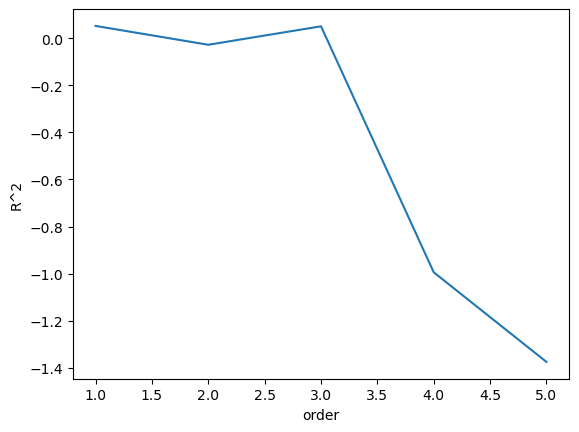

In [24]:
# Write your code below and press Shift+Enter to execute 
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')

# Task 3 : Ridge Regression

Now consider that you have multiple features, i.e. 'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU' and 'Category'. Create a polynomial feature model that uses all these parameters with degree=2. Also create the training and testing attribute sets.


In [25]:
# Write your code below and press Shift+Enter to execute 
pr2 = PolynomialFeatures(degree=2)
x_train_pr2 = pr2.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])
x_test_pr2 = pr2.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])

Create a Ridge Regression model and evaluate it using values of the hyperparameter alpha ranging from 0.001 to 1 with increments of 0.001. 
Create a list of all Ridge Regression R^2 scores for training and testing data. 


In [42]:
# Write your code below and press Shift+Enter to execute 
Rsqu_train = []
Rsqu_test = []
Alpha = np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)
for alpha in pbar:
    RidgeModel = Ridge(alpha=alpha)
    RidgeModel.fit(x_train_pr2, y_train)
    train_score = RidgeModel.score(x_train_pr2, y_train)
    test_score = RidgeModel.score(x_test_pr2, y_test)
    Rsqu_train.append(train_score)
    Rsqu_test.append(test_score)

100%|██████████| 999/999 [00:02<00:00, 477.48it/s]


Plot the R^2 values for training and testing sets with respect to the value of alpha


Text(0, 0.5, 'R^2')

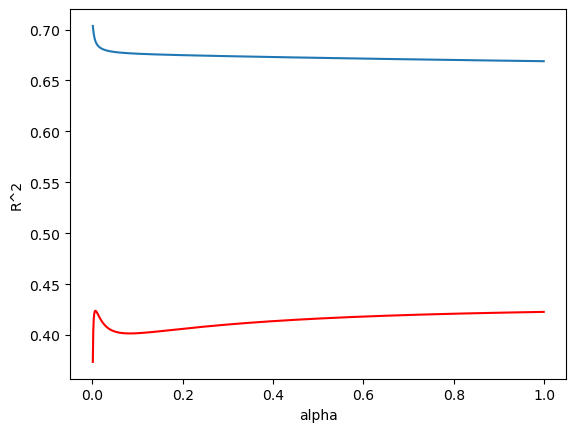

In [43]:
# Write your code below and press Shift+Enter to execute 
plt.plot(Alpha, Rsqu_train, label='training data')
plt.plot(Alpha, Rsqu_test, 'r', label='validation data')
plt.xlabel('alpha')
plt.ylabel('R^2')

# Task 4: Grid Search

Using the raw data and the same set of features as used above, use GridSearchCV to identify the value of alpha for which the model performs best. 
Assume the set of alpha values to be used as
```math
{0.0001, 0.001, 0.01, 0.1, 1, 10}
```


In [44]:
# Write your code below and press Shift+Enter to execute 
parameters = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}]

Create a Ridge instance and run Grid Search using a 4 fold cross validation.


In [45]:
# Write your code below and press Shift+Enter to execute 
Grid = GridSearchCV(Ridge(), parameters, cv=4)

Fit the Grid Search to the training data.


In [46]:
Grid.fit(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

Print the R^2 score for the test data using the estimator that uses the derived optimum value of alpha.


In [49]:
# Write your code below and press Shift+Enter to execute 
Grid.cv_results_

{'mean_fit_time': array([0.00455928, 0.00334108, 0.00300485, 0.00202197, 0.00352752,
        0.00213164]),
 'std_fit_time': array([0.00280146, 0.00021124, 0.00035712, 0.00035302, 0.00078271,
        0.0007278 ]),
 'mean_score_time': array([0.00237548, 0.00210917, 0.00174505, 0.00196677, 0.00260645,
        0.002168  ]),
 'std_score_time': array([0.00041629, 0.00018899, 0.00043212, 0.00049662, 0.00042493,
        0.00020217]),
 'param_alpha': masked_array(data=[0.0001, 0.001, 0.01, 0.1, 1, 10],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0.0001},
  {'alpha': 0.001},
  {'alpha': 0.01},
  {'alpha': 0.1},
  {'alpha': 1},
  {'alpha': 10}],
 'split0_test_score': array([0.13485156, 0.13486824, 0.13503119, 0.1363436 , 0.14213269,
        0.22415919]),
 'split1_test_score': array([0.61094587, 0.61095407, 0.61103035, 0.61130756, 0.60051284,
        0.54811677]),
 'split2_test_score': array([0.4820574 , 0

In [55]:
Grid.best_estimator_

Ridge(alpha=10)

In [51]:
bestRR = Grid.best_estimator_
print(bestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU', 'Category']], y_test))

0.300990504869182


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


Copyright © 2023 IBM Corporation. All rights reserved.
